In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diabetes_dataframe = pd.read_csv('./Diabetes dataset/Clean_diabetes_dataset.csv')
diabetes_dataframe.head(10)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0
5,6,3,78,50,32,88,31.0,0.248,26,1
6,10,4,110,92,0,0,37.6,0.191,30,0
7,11,10,168,74,0,0,38.0,0.537,34,1
8,14,5,166,72,19,175,25.8,0.587,51,1
9,16,0,118,84,47,230,45.8,0.551,31,1


In [4]:
# checking co-relationn 
corr_matrix = diabetes_dataframe.corr()
corr_matrix

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.000000,-0.036976,0.015439,0.028201,0.035387,0.033558,0.038722,-0.011275,0.019538,-0.028682
Pregnancies,-0.036976,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.015439,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.028201,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,0.035387,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,0.033558,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.038722,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,-0.011275,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.019538,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,-0.028682,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


In [5]:
corr_matrix['Outcome']*100

Unnamed: 0                   -2.868235
Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
SkinThickness                 3.067563
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

In [6]:
diabetes_dataframe.drop(columns = ['Unnamed: 0','SkinThickness','Insulin','DiabetesPedigreeFunction'], inplace=True)

In [7]:
diabetes_dataframe.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,5,116,74,25.6,30,0


In [8]:
X = diabetes_dataframe.drop(['Outcome'], axis='columns')
X.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,6,148,72,33.6,50
1,1,85,66,26.6,31
2,8,183,64,23.3,32
3,1,89,66,28.1,21
4,5,116,74,25.6,30


In [9]:
y = diabetes_dataframe.Outcome
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
len(X_train) # 511
len(X_test)  # 128

128

In [11]:
from sklearn.svm import SVC
Score = {}
C = [1,10,20,30]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
for c in C:
    for k in kernel:
        model = SVC(C=c,kernel=k)
        model.fit(X_train,y_train)
        acc = model.score(X_test,y_test)*100
        Score[c,k] = acc
# for k in kernel:
#     for c in C:
#         for g in gamma:
#             model = SVC(C=c,kernel=k, gamma=g)
#             model.fit(X_train,y_train)
#             acc = model.score(X_test,y_test)*100
#             Score[k,c,g] = acc        
                
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())

((1, 'poly'), 78.90625)

In [12]:
from sklearn.svm import SVC
model = SVC(C=10,kernel='poly',gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7265625

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        92
           1       0.51      0.64      0.57        36

    accuracy                           0.73       128
   macro avg       0.68      0.70      0.68       128
weighted avg       0.75      0.73      0.73       128



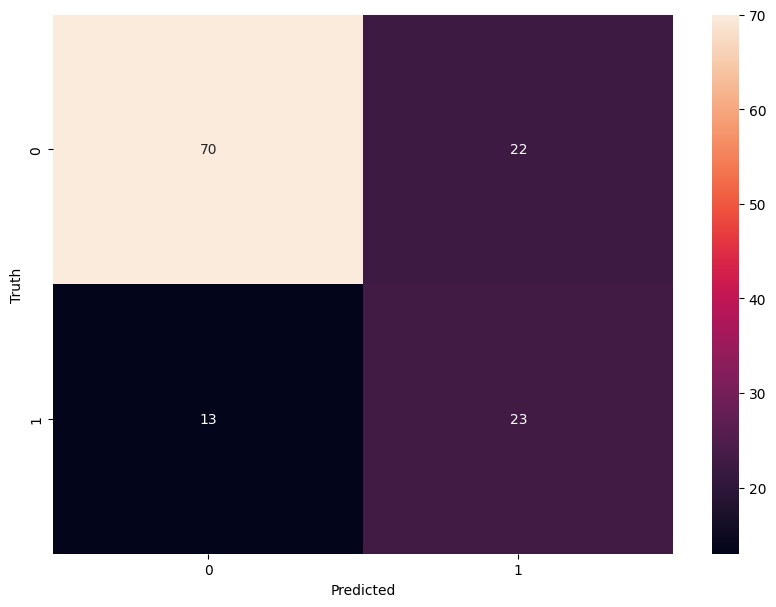

In [14]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(classification_report(y_test, y_pred))